In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

hqDetails = pd.read_excel (r'2017-05-21-22-12-46_headquarter_details.xlsx')
hqSpecificCol = pd.DataFrame(hqDetails, columns=['HQ Company Nr','HQ Region','HQ Industry', 'HQ Insured Lives', 'HQ Pooled Lives', 'HQ Potential'])

lpDetails = pd.read_excel (r'2017-05-21-22-15-07_local_projects.xls')
lpSpecificCol = pd.DataFrame(lpDetails, columns= ['HQ Company Nr','Subsidiary Country ISO Code','LP Status', 'LP Substatus', 'LP Yearly Benefit Name Aggregated', 'LP Yearly Data Insured Lives','LP Yearly Data Pooling Status', 'LP Yearly Data Annual Premium (LCY)','LP Yearly Data Currency'])

currencyFile = pd.read_excel (r'2017-05-21-21-47-39_pla_currencies.xlsx', columns=['Currency Iso code', 'Production NWP'])

In [2]:
joinedSheet = lpSpecificCol.merge(hqSpecificCol, how="left", on="HQ Company Nr")
joinedSheet

,HQ Company Nr,Subsidiary Country ISO Code,LP Status,LP Substatus,LP Yearly Benefit Name Aggregated,LP Yearly Data Insured Lives,LP Yearly Data Pooling Status,LP Yearly Data Annual Premium (LCY),LP Yearly Data Currency,HQ Region,HQ Industry,HQ Insured Lives,HQ Pooled Lives,HQ Potential
0,1030753,AT,Contract,In action,Old age pensions,10.0,NaN,NaN,EUR,N-America,Unknown migration,3750.0,1228.0,1138.9
1,1814390,CH,Contract,Terminated,NaN,NaN,NaN,NaN,NaN,N-Europe,Other,254.0,154.0,90.0
2,1030890,CN,Contract,In action,"Lump sum death, Medical, Critical illness, Acc...",1050.0,NaN,580818.0,CNY,Europe,"Textiles, Leatherware, Jewelry",2677.0,1219.0,0.0
3,1002717,SE,Contract,In action,"Lump sum death, Medical, Old age pensions",4.0,NaN,571704.0,SEK,Europe,"Banking, Finance, Insurance, Consult",4.0,0.0,0.0
4,1030512,AT,Contract,In action,"Disability pensions, Lump sum death",22.0,NaN,19000.0,EUR,N-Europe,"Chemicals, Pharmaceuticals, Cosmetics",1641.0,143.0,6122.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36652,3016668,FR,Opportunity,Lost,"Disability pensions, Lump sum death, Medical",511.0,NaN,744283.0,EUR,N-America,Other,440.0,0.0,6074.2
36653,3016668,CH,Opportunity,In process,Accidental death and dismemberment,10.0,NaN,NaN,CHF,N-America,Other,440.0,0.0,6074.2
36654,3016668,HK,Opportunity,Lost,"Lump sum death, Accidental death and dismember...",75.0,NaN,314831.0,HKD,N-America,Other,440.0,0.0,6074.2
36655,3016668,HK,Opportunity,Lost,Medical,187.0,NaN,1280592.0,HKD,N-America,Other,440.0,0.0,6074.2


In [3]:
joinedSheet.shape

(36657, 14)

In [4]:
#dropping NaN values because the joinesSheet has 36657 rows, huge data, so dropping won't make any difference
#we are dropping data entry (row), not the variable
#if the row number was not this much we would have handled this
#replacing this with avg like
#mean=joinedSheet['LP Yearly Data Insured Lives'].mean()
#joinedSheet['LP Yearly Data Insured Lives'],replace(np.nan, mean)
#joinedSheet= joinedSheet[joinedSheet['LP Yearly Data Insured Lives'].mean()] --as it consists of numeric value
#for values that are not numeric, we use mode
#replaced based on other methods
#LP Yearly Data Pooling Status null gula binary 1,0
joinedSheet.dropna(subset=["HQ Company Nr"], axis=0, inplace=True)
joinedSheet.dropna(subset=["LP Yearly Data Currency",
                           'Subsidiary Country ISO Code',
                           'LP Status',
                           'LP Substatus', 
                           'LP Yearly Benefit Name Aggregated', 
                           'LP Yearly Data Insured Lives', 
                           'LP Yearly Data Annual Premium (LCY)',
                           "HQ Industry",
                           'HQ Insured Lives', 
                           'HQ Pooled Lives', 
                           'HQ Potential'], axis=0, inplace=True)

joinedSheet['LP Yearly Data Pooling Status'].replace(to_replace =["Pooled", np.nan], value =[1, 0], inplace=True)
joinedSheet = joinedSheet[joinedSheet['LP Yearly Data Annual Premium (LCY)'] <50000]
joinedSheet = joinedSheet[joinedSheet['LP Yearly Data Annual Premium (LCY)'] >100]

joinedSheet.shape

(11742, 14)

In [5]:
#DATA FORMATTING
#when?
#NY-NewYork-newyork
#unit conversion like:
#dg["smt"]=235/df["smt"]
#unit conversion for currency
# removing NaN values from exchange rates
currencyFile = currencyFile[currencyFile['Production NWP'].notna()]
joinedSheet = joinedSheet.reset_index(drop=True)

for i in joinedSheet.index:
    joinedSheet['LP Yearly Data Annual Premium (LCY)'].iloc[i] = ((joinedSheet['LP Yearly Data Annual Premium (LCY)'].iloc[i])*((currencyFile.loc[currencyFile['Currency Iso code'] == joinedSheet['LP Yearly Data Currency'].iloc[i], 'Production NWP']).iloc[0]))

#del joinedSheet['LP Yearly Data Currency']
print(joinedSheet.shape)

#df.rename(columns={"smt":"newname"}, inplace=True)
#joinedSheet.rename(columns={"LP Yearly Data Single Premium":"Converted LP Yearly Data Single Premium"}, inplace=True)

#incorrect data types assigned to a feature
#df["a"]=df["a"].astype("int")


G:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(11742, 14)


In [6]:
#astype
#joinedSheet.describe()
joinedSheet["HQ Company Nr"].tail(5)


11737    2898134
11738    2908543
11739    2959856
11740    3003925
11741    3020374
Name: HQ Company Nr, dtype: int64

In [7]:
joinedSheet["Subsidiary Country ISO Code"]


0        AT
1        AT
2        AT
3        AT
4        AT
         ..
11737    SG
11738    CO
11739    IE
11740    IE
11741    GB
Name: Subsidiary Country ISO Code, Length: 11742, dtype: object

In [8]:
joinedSheet["LP Status"].tail(5)

11737    Opportunity
11738    Opportunity
11739    Opportunity
11740    Opportunity
11741    Opportunity
Name: LP Status, dtype: object

In [9]:
joinedSheet["LP Substatus"].tail(5)

11737    Quote
11738    Quote
11739     Lost
11740     Lost
11741    Quote
Name: LP Substatus, dtype: object

In [10]:
joinedSheet["LP Yearly Benefit Name Aggregated"].tail(5)

11737    Disability pensions, Lump sum death, Medical, ...
11738    Lump sum death, Medical, Accidental death and ...
11739                                       Lump sum death
11740                  Disability pensions, Lump sum death
11741                                       Lump sum death
Name: LP Yearly Benefit Name Aggregated, dtype: object

In [11]:
joinedSheet["LP Yearly Data Insured Lives"].tail(5)

11737     12.0
11738     45.0
11739     47.0
11740     33.0
11741    218.0
Name: LP Yearly Data Insured Lives, dtype: float64

In [12]:
joinedSheet["LP Yearly Data Pooling Status"].tail(5)

11737    0
11738    0
11739    0
11740    0
11741    0
Name: LP Yearly Data Pooling Status, dtype: int64

In [13]:
joinedSheet["LP Yearly Data Annual Premium (LCY)"].tail(5)

11737    16384.68000
11738        5.57931
11739    11455.56000
11740    11679.12000
11741    23328.36000
Name: LP Yearly Data Annual Premium (LCY), dtype: float64

In [14]:
joinedSheet["LP Yearly Data Currency"].tail(5)

11737    SGD
11738    COP
11739    EUR
11740    EUR
11741    GBP
Name: LP Yearly Data Currency, dtype: object

In [15]:
joinedSheet["HQ Region"]

0         N-Europe
1        N-America
2           Europe
3           Europe
4        N-America
           ...    
11737       Europe
11738    N-America
11739       Europe
11740    N-America
11741       Europe
Name: HQ Region, Length: 11742, dtype: object

In [16]:
joinedSheet["HQ Industry"].tail(5)

11737                                       Other
11738                                       Other
11739        Banking, Finance, Insurance, Consult
11740    Computers, Electronics, Office Equipment
11741                                       Other
Name: HQ Industry, dtype: object

In [17]:
joinedSheet["HQ Insured Lives"].tail(5)

11737      0.0
11738      0.0
11739    392.0
11740      0.0
11741      0.0
Name: HQ Insured Lives, dtype: float64

In [18]:
joinedSheet["HQ Pooled Lives"].tail(5)

11737    0.0
11738    0.0
11739    0.0
11740    0.0
11741    0.0
Name: HQ Pooled Lives, dtype: float64

In [19]:
joinedSheet["HQ Potential"].tail(5)

11737    0.0
11738    0.0
11739    0.0
11740    0.0
11741    0.0
Name: HQ Potential, dtype: float64

In [20]:
#print(joinedSheet["LP Yearly Data Annual Premium (LCY)"])
#normalization
#when two values are in different range, and doing linear regression
#the feature that has high range of values will influence the result most
#doesn't necessarily mean it's important as a predictor
#normalize variables to range between 0 to 1
#similar value range, similar intrinsic influence on analytical model

#let's see the range of some values with mean
joinedSheet["LP Yearly Data Insured Lives"].mean()

64.77789133026742

In [21]:
joinedSheet["HQ Insured Lives"].mean()


8833.932038834952

In [22]:
joinedSheet["HQ Pooled Lives"].mean()

2205.396184636348

In [23]:
#joinedSheet["HQ Potential"].mean()
#so need to normalize these values

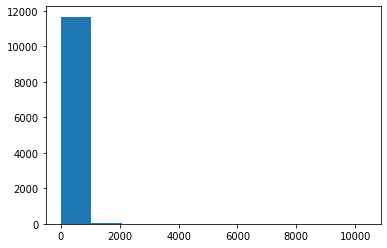

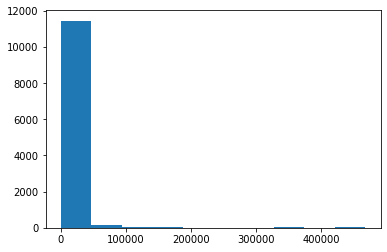

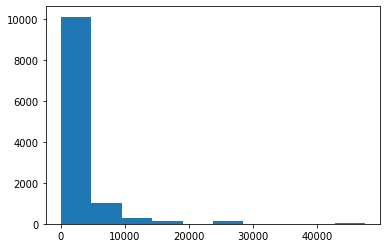

In [24]:
#normalitycheck through histogram
#not derived from gaussian distribution
#A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.
#continuous probability distribution for a real-valued random variable
from matplotlib import pyplot
pyplot.hist(joinedSheet["LP Yearly Data Insured Lives"])
pyplot.show()
pyplot.hist(joinedSheet["HQ Insured Lives"])
pyplot.show()

pyplot.hist(joinedSheet["HQ Pooled Lives"])
pyplot.show()
#pyplot.hist(joinedSheet["HQ Potential"])
#pyplot.show()

In [25]:
#simple feature scaling : xnew=xold/xmax
#df["a"]=df["a"]/df["a"].max()
#joinedSheet["a"]=joinedSheet["a"]/joinedSheet["a"].max()
#min-max : xnew=xold-xmin/xmax-xmin

#we will use min-max for normalization, not z-score
#because through normality check we have seen the data is not derived from gaussian distribution,
#otherwise the histogram would be a bell-curve

joinedSheet["LP Yearly Data Insured Lives"]=(joinedSheet["LP Yearly Data Insured Lives"]-joinedSheet["LP Yearly Data Insured Lives"].min())/(joinedSheet["LP Yearly Data Insured Lives"].max()-joinedSheet["LP Yearly Data Insured Lives"].min())
joinedSheet["HQ Insured Lives"]=(joinedSheet["HQ Insured Lives"]-joinedSheet["HQ Insured Lives"].min())/(joinedSheet["HQ Insured Lives"].max()-joinedSheet["HQ Insured Lives"].min())
joinedSheet["HQ Pooled Lives"]=(joinedSheet["HQ Pooled Lives"]-joinedSheet["HQ Pooled Lives"].min())/(joinedSheet["HQ Pooled Lives"].max()-joinedSheet["HQ Pooled Lives"].min())
#joinedSheet["HQ Potential"]=(joinedSheet["HQ Potential"]-joinedSheet["HQ Potential"].min())/(joinedSheet["HQ Potential"].max()-joinedSheet["HQ Potential"].min())

joinedSheet.head()
#z-score/standard score= xold-avgofthefeature meu/standard deviation sigma
#value around 0, between -3 and +3
#df["a"]=df["a"]-df["a"].mean()/df["a"].std()


,HQ Company Nr,Subsidiary Country ISO Code,LP Status,LP Substatus,LP Yearly Benefit Name Aggregated,LP Yearly Data Insured Lives,LP Yearly Data Pooling Status,LP Yearly Data Annual Premium (LCY),LP Yearly Data Currency,HQ Region,HQ Industry,HQ Insured Lives,HQ Pooled Lives,HQ Potential
0,1030512,AT,Contract,In action,"Disability pensions, Lump sum death",0.002127,0,20520.00,EUR,N-Europe,"Chemicals, Pharmaceuticals, Cosmetics",0.003505,0.003014,6122.9
1,1030644,AT,Contract,In action,"Disability pensions, Orphans' pensions, Widow/...",0.002320,0,1721.52,EUR,N-America,"Computers, Electronics, Office Equipment",0.009929,0.023119,0.0
2,1030634,AT,Contract,Terminated,"Disability pensions, Orphans' pensions, Widow/...",0.009378,0,14496.84,EUR,Europe,Other,0.001457,0.012118,383512.6
3,1030634,AT,Contract,In action,"Disability pensions, Orphans' pensions, Widow/...",0.015566,1,1549.80,EUR,Europe,Other,0.001457,0.012118,383512.6
4,1031097,AT,Contract,In action,"Disability pensions, Orphans' pensions, Widow/...",0.001644,1,1064.88,EUR,N-America,"Motor Vehicles, Metal Products, Tools",0.003629,0.009842,36717.7


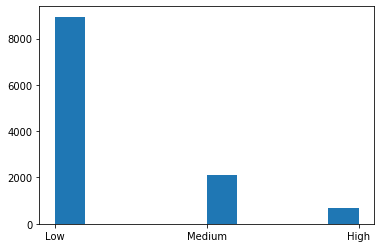

In [26]:
#binning
#bins=np.linspace(min(df["a"]), max(df["a"],4))
#groupnames=["Low", "Medium", "High"]
#df["b"]=pd.cut(df["a"], bins,labels=groupnames,include_lowest=True)
#use histogram to visualize
#most cars have low price , only very few cars have high price

bins=np.linspace(min(joinedSheet['LP Yearly Data Annual Premium (LCY)']), max(joinedSheet['LP Yearly Data Annual Premium (LCY)']),4)
groupnames=["Low", "Medium", "High"]
joinedSheet["newbin"]=pd.cut(joinedSheet["LP Yearly Data Annual Premium (LCY)"], bins,labels=groupnames,include_lowest=True)
#joinedSheet["newbin"]
#neg value drop korte hbe
pyplot.hist(joinedSheet["newbin"])
pyplot.show()

In [27]:
#pd.get_dummies(df["a"])
pd.get_dummies(joinedSheet["Subsidiary Country ISO Code"])

#EDA 
#summarize main characteristics of the data
#Gain better understanding of the dataset
#relationship between var
#extract important vars
#df.describe() nan skipped
#joinedSheet.describe()

,AE,AM,AR,AT,AU,BB,BE,BM,BR,CA,...,SV,TH,TN,TR,TW,UA,US,VA,VE,ZA
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#drive_wheel_counts=df["drive_wheels"].value_counts()
#drive_wheel_counts.rename(columns={"drive_wheels":"value counts" inplace=True})
#drive_wheel_counts.index.name='drive_wheels'

lpstatus_counts=joinedSheet["LP Status"].value_counts()
#lpstatus_counts.rename(columns={"LP Status":"value counts" inplace=True})
lpstatus_counts.index.name='lpstatus'
lpstatus_counts
#only one type of data, no influence? no need to binary/one-hot encode
#no need of making quantitative

lpstatus
Contract       10473
Opportunity     1269
Name: LP Status, dtype: int64

In [29]:
lpsubstatus_counts=joinedSheet["LP Substatus"].value_counts()
#lpstatus_counts.rename(columns={"LP Status":"value counts" inplace=True})
lpsubstatus_counts.index.name='lpsubstatus'
lpsubstatus_counts
#binary encode will do(as there are only two types)/ one-hot encode
#will do one-hot encode
#terminated lost thakbe na


lpsubstatus
Terminated    6527
In action     3946
Lost          1114
Won             71
Quote           68
In process      16
Name: LP Substatus, dtype: int64

In [30]:
indexNames = joinedSheet[ joinedSheet['LP Substatus'] == 'Terminated' ].index
joinedSheet.drop(indexNames , inplace=True)

indexNames = joinedSheet[ joinedSheet['LP Substatus'] == 'Lost' ].index
joinedSheet.drop(indexNames , inplace=True)

lpsubstatus_counts=joinedSheet["LP Substatus"].value_counts()
#lpstatus_counts.rename(columns={"LP Status":"value counts" inplace=True})
lpsubstatus_counts.index.name='lpsubstatus'
lpsubstatus_counts

lpsubstatus
In action     3946
Won             71
Quote           68
In process      16
Name: LP Substatus, dtype: int64

In [31]:
#pd.get_dummies(joinedSheet["LP Substatus"])

joinedSheet['LP Substatus'] = pd.Categorical(joinedSheet['LP Substatus'])
dfDummies = pd.get_dummies(joinedSheet['LP Substatus'], prefix = 'lp_substatus_')
joinedSheet = pd.concat([joinedSheet, dfDummies], axis=1)

joinedSheet['Subsidiary Country ISO Code'] = pd.Categorical(joinedSheet['Subsidiary Country ISO Code'])
dfDummies = pd.get_dummies(joinedSheet['Subsidiary Country ISO Code'], prefix = 'ISO')
joinedSheet = pd.concat([joinedSheet, dfDummies], axis=1)

joinedSheet['HQ Region'] = pd.Categorical(joinedSheet['HQ Region'])
dfDummies = pd.get_dummies(joinedSheet['HQ Region'], prefix = 'hq_region')
joinedSheet = pd.concat([joinedSheet, dfDummies], axis=1)

joinedSheet.shape

(4101, 83)

In [32]:
lp_yearly_data_pooling_status_counts=joinedSheet["LP Yearly Data Pooling Status"].value_counts()
#lpstatus_counts.rename(columns={"LP Status":"value counts" inplace=True})
lp_yearly_data_pooling_status_counts.index.name='lp_yearly_data_pooling_status'
lp_yearly_data_pooling_status_counts
#only one type of data, no influence? no need to binary/one-hot encode
#no need of making quantitative

lp_yearly_data_pooling_status
0    2892
1    1209
Name: LP Yearly Data Pooling Status, dtype: int64

In [33]:
#box-plots to visualize the data
#shows the median,upper quartile shows the 75th percentile, lower quertile shows the 25th percentile
#data between upper and lower quartile represents the interquartile range
#lower and upper extreme = calculated as 1.5 times the interquartile range above the 75th percentile and 
#as 1.5times of the IQR below the 25th percentile
#outliers as individual dots occur outside upper and lower extremes
#with boxplot see outliers , skewness and distribuion of data
#makes it easier to compare between groups
#sns.boxplot(x="a", y="price", data="df")
import seaborn as sns
sns.boxplot(x="HQ Pooled Lives", y="LP Yearly Data Annual Premium (LCY)", data="joinedSheet")
#check if there is any string value

AttributeError: 'str' object has no attribute 'get'

In [ ]:
#scatterplot
#can x predict y?
#x predictor var y target var
#y=df[a]
#x=df[b]
#plt.scatter(x,y)
#plt.title(), plt.xlabel(), plt.ylabel()

y=joinedSheet['LP Yearly Data Annual Premium (LCY)']
x=joinedSheet['HQ Pooled Lives']
pyplot.scatter(x,y)
pyplot.title("HQ Pooled Lives vs LP Yearly Data Annual Premium (LCY)")
pyplot.xlabel("HQ Pooled Lives")
pyplot.ylabel("LP Yearly Data Annual Premium (LCY)")
#is there positive linear relationship between x and y?


y=joinedSheet['LP Yearly Data Annual Premium (LCY)']
x=joinedSheet['HQ Insured Lives']
pyplot.scatter(x,y)
pyplot.title("HQ Insured Lives vs LP Yearly Data Annual Premium (LCY)")
pyplot.xlabel("HQ Insured Lives")
pyplot.ylabel("LP Yearly Data Annual Premium (LCY)")

In [ ]:
#Groupby() : applied to categorical var, group data into categories, single or multiple vars
#for different types of bodystyles and drive wheels how the avg differs?
#df_test=df[["a","b","c"]]
#df_grp=df_test.Groupby()['a','b'], as_index=False).mean()
#df_grp
#df_pivot=df_grp.pivot(index='a', columns='b')

df_test=joinedSheet[["HQ Region","Subsidiary Country ISO Code","LP Yearly Data Annual Premium (LCY)"]]
df_grp=df_test.groupby(['HQ Region','Subsidiary Country ISO Code'], as_index=False).mean()
df_grp
df_pivot=df_grp.pivot(index='HQ Region', columns='Subsidiary Country ISO Code')
df_pivot

In [ ]:
sns.regplot(x="HQ Insured Lives", y="LP Yearly Data Annual Premium (LCY)", data=joinedSheet)
pyplot.ylim(0,)
#negative linear relationship



In [ ]:
sns.regplot(x="HQ Pooled Lives", y="LP Yearly Data Annual Premium (LCY)", data=joinedSheet)
pyplot.ylim(0,)
#negative linear relationship

In [ ]:
#strength of co-relation between continuous numerical variables : pearson correlation
#co-relation coefficient and p-value
#corelation coefficient : value close to +1: large positive relationship
#value close to -1: large neg , colse to 0: no relation
#p-value : how certain we are about the co-eff calculated
#p-value<0.001 strong certainty <0.05 moderate certainty <0.1 weak certainty  >0.1 no certainty
#strong correlation -coeff close to -1/+1p-value<0.001
#scipy stats package
from scipy import stats
pearson_coef,p_value=stats.pearsonr(joinedSheet['HQ Pooled Lives'],joinedSheet['LP Yearly Data Annual Premium (LCY)'])
pearson_coef
#negative relationship

In [ ]:
p_value
#weak certainty

In [ ]:
#which category of a feature has most or least impact: comparison between categories of a feature
#on a prediction
#finding corelation between different groups of a categorical vaiable
#we get f-test score variation between sample group means divided by variation within sample group
#p-value: confidence degree
#large f-value : difference high between mean prices of the two categories (of car)
df_anova=joinedSheet[['HQ Region','LP Yearly Data Annual Premium (LCY)']]
grouped_anova=df_anova.groupby(['HQ Region'])
anova_results_1=stats.f_oneway(grouped_anova.get_group('N-America')['LP Yearly Data Annual Premium (LCY)'],grouped_anova.get_group('Europe')['LP Yearly Data Annual Premium (LCY)'])
anova_results_1


In [ ]:
joinedSheet['LP Status'].replace(to_replace =['Contract', 'Opportunity'], value =[1, 0], inplace=True)

In [ ]:
joinedSheet['LP Status']

In [ ]:
joinedSheet = joinedSheet[joinedSheet['LP Yearly Data Annual Premium (LCY)'] <50000]
joinedSheet = joinedSheet[joinedSheet['LP Yearly Data Annual Premium (LCY)'] >100]

joinedSheet=joinedSheet[joinedSheet['LP Yearly Benefit Name Aggregated'].notna()]

In [ ]:

#aggregatedBenefits =joinedSheet['LP Yearly Benefit Name Aggregated']
#joinedSheet=joinedSheet[joinedSheet['LP Yearly Benefit Name Aggregated'].notna()

# break benefit names and perform one hot encoding
aggregatedBenefits = joinedSheet['LP Yearly Benefit Name Aggregated'].tolist()
i = 0
#print(benefits)
for benefit in aggregatedBenefits:
    split_data = benefit.split(',')
    j = 0
    #print(splittedBenefits)
    for y in split_data:
        split_data[j] = y.strip()
        j = j + 1
    delimeter = '^'
    aggregatedBenefits[i] = delimeter.join(split_data)
    i = i + 1
#print(aggregatedBenefits)
#print(merged_data['LP Yearly Benefit Name Aggregated'])
joinedSheet['LP Yearly Benefit Name Aggregated'] = aggregatedBenefits
#print(joinedSheet['LP Yearly Benefit Name Aggregated'])

finalBenefit = joinedSheet['LP Yearly Benefit Name Aggregated'].str.split('^', expand=True).stack()
print(finalBenefit)
benefit = pd.get_dummies(finalBenefit, prefix='benefit').groupby(level=0).sum()


joinedSheet = pd.concat([joinedSheet, benefit], axis=1, sort=False)
del joinedSheet['LP Yearly Benefit Name Aggregated']

print(joinedSheet.shape)

#for i in range (0,572):
    #print(joinedSheet.columns[i])




In [ ]:
#joinedSheet['LP Yearly Data Pooling Status'].replace(to_replace =["Pooled", np.nan], value =[1, 0], inplace=True)
joinedSheet['LP Yearly Data Pooling Status']
joinedSheet.shape

In [ ]:
joinedSheet['HQ Industry'] = pd.Categorical(joinedSheet['HQ Industry'])
dfDummies = pd.get_dummies(joinedSheet['HQ Industry'], prefix = 'hq_industry')
joinedSheet = pd.concat([joinedSheet, dfDummies], axis=1)

In [ ]:
joinedSheet.shape


In [ ]:
for i in range (0,106):
    print(joinedSheet.columns[i])

In [ ]:
#joinedSheet['LP Yearly Data Pooling Status'].replace(to_replace =["Pooled", np.nan], value =[1, 0], inplace=True)


In [ ]:
joinedSheet.to_csv('DDa_Annual_Premium_Dataset.csv', index = False, header=True)